In [ ]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
# Assuming the uploaded file is named 'bodyPerformance.csv'
data = pd.read_csv('bodyPerformance.csv')

# View the data
data.head()

Saving bodyPerformance.csv to bodyPerformance (1).csv


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
age_mean = data['age'].mean()
age_median = data['age'].median()

# Apply Mode to 'gender'
gender_mode = data['gender'].mode()[0]

# Calculate Geometric Mean for 'age'
age_geometric_mean = np.exp(np.mean(np.log(data['age'])))

# Calculate Harmonic Mean for 'age'
age_harmonic_mean = len(data['age']) / np.sum(1 / data['age'])

# Output the results
print(f"Mean of Age: {age_mean}")
print(f"Median of Age: {age_median}")
print(f"Mode of Gender: {gender_mode}")
print(f"Geometric Mean of Age: {age_geometric_mean}")
print(f"Harmonic Mean of Age: {age_harmonic_mean}")

Mean of Age: 36.77510639886508
Median of Age: 32.0
Mode of Gender: M
Geometric Mean of Age: 34.4243198961257
Harmonic Mean of Age: 32.35378623309816


In [ ]:
from scipy.stats import skew
# Calculate Variance and Standard Deviation for 'age'
age_variance = data['age'].var()
age_std_dev = data['age'].std()

# Calculate Interquartile Range (IQR)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate Range
age_range = data['age'].max() - data['age'].min()

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(data['age'] - age_mean))

# Calculate Skewness
age_skewness = skew(data['age'])

# Determine Shape of Data
if age_skewness < -1:
    shape = "Highly Skewed Left"
elif -1 <= age_skewness < 0:
    shape = "Moderately Skewed Left"
elif 0 < age_skewness < 1:
    shape = "Moderately Skewed Right"
else:
    shape = "Highly Skewed Right"

# Output the results
print(f"Variance of Age: {age_variance}")
print(f"Standard Deviation of Age: {age_std_dev}")
print(f"Interquartile Range (IQR) of Age: {IQR}")
print(f"Range of Age: {age_range}")
print(f"Mean Absolute Deviation (MAD) of Age: {mad}")
print(f"Skewness of Age: {age_skewness}")
print(f"Shape of Data: {shape}")

Variance of Age: 185.65805111061695
Standard Deviation of Age: 13.625639475291313
Interquartile Range (IQR) of Age: 23.0
Range of Age: 43.0
Mean Absolute Deviation (MAD) of Age: 11.844361839537575
Skewness of Age: 0.5998283463665565
Shape of Data: Moderately Skewed Right


In [ ]:
# Convert categorical columns to numeric (one-hot encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                              age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.293980  -0.099966    0.242302   
height_cm               -0.293980   1.000000   0.734909   -0.515440   
weight_kg               -0.099966   0.734909   1.000000   -0.084065   
body fat_%               0.242302  -0.515440  -0.084065    1.000000   
diastolic                0.158508   0.145933   0.262317    0.048059   
systolic                 0.211167   0.210186   0.338943   -0.030376   
gripForce               -0.179583   0.735024   0.700119   -0.541788   
sit and bend forward_cm -0.070033  -0.221970  -0.296249   -0.071225   
sit-ups counts          -0.544581   0.500424   0.294899   -0.608912   
broad jump_cm           -0.435172   0.674589   0.479564   -0.673273   
gender_M                -0.060229   0.730899   0.672887   -0.551407   
class_B                  0.012666   0.001404  -0.040330   -0.095466   
class_C                 -0.003199   0.041279  -0.033199  

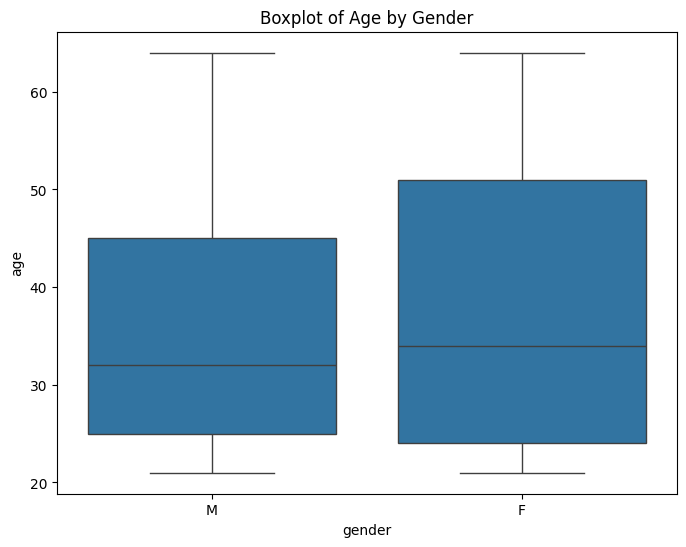

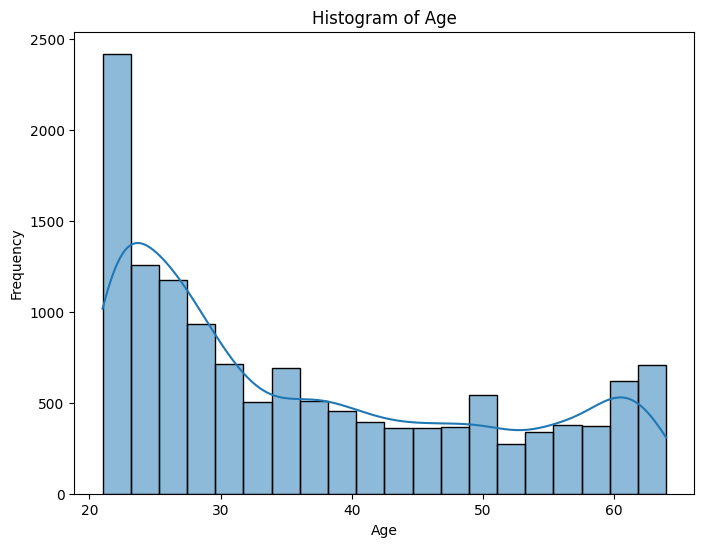

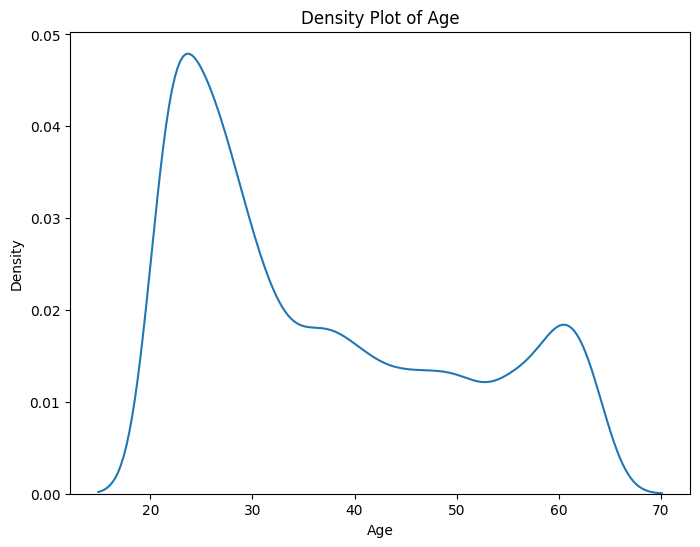

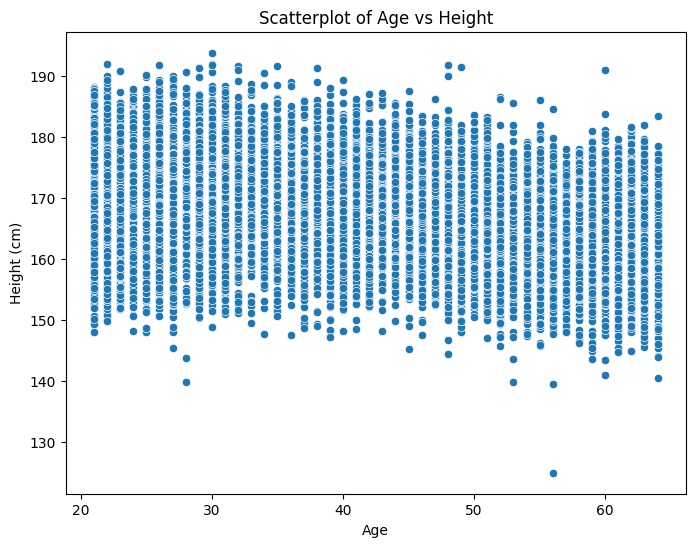

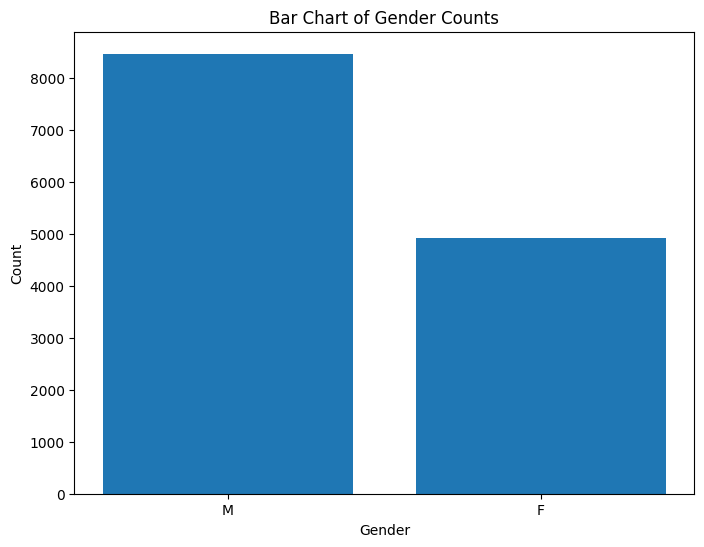

In [ ]:
# prompt: Boxplot, Histograms, Density plots, Scatterplot, Bar chart

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Boxplot of Age by Gender')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['age'])
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='height_cm', data=data)
plt.title('Scatterplot of Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.show()

# Bar chart
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Bar Chart of Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
